In [40]:
#=====================================
# Necessary installs and imports
#=====================================

# If not already installed, run these:
#!pip install pyreadr

import pyreadr
import pandas as pd

In [10]:
#=====================================
# Load Data
#=====================================
rda_path = "/Users/cparijat/Documents/GitHub/STATS604_Project2/data/brain.rda"

# Load the RDA file
result = pyreadr.read_r(rda_path)

# The result is a dictionary where keys are object names from the R session
print(result.keys())

odict_keys(['expression', 'arraymeta', 'genemeta'])


In [14]:
#=======================
# Create dataframe
#=======================
# Extract the first object (assuming your dataset is the first one)
df_expression = result["expression"]
df_arraymeta  = result["arraymeta"]
df_genemeta   = result["genemeta"]

# Display first few rows
print(df_expression.head())
print(df_arraymeta.head())
print(df_genemeta.head())


   1007_s_at   1053_at    117_at     121_at  1255_g_at   1294_at   1316_at  \
0   8.597381  6.643790  6.742402   7.738635   6.477350  7.388334  6.734768   
1   7.507421  6.185789  6.377131   7.152656   6.002777  6.515969  6.430514   
2   9.151820  7.508944  7.924755   9.778946   6.991540  8.059766  8.198715   
3   9.480747  7.229395  7.330518   8.724294   6.897049  7.979412  7.213397   
4  10.855653  8.573288  8.519262  10.045489   8.053849  9.042049  8.379321   

    1320_at  1405_i_at   1431_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  6.501485   6.312102  6.274967  ...              9.472115   
1  6.105450   5.947936  5.947524  ...              8.665336   
2  7.433385   7.047425  7.169980  ...             10.752882   
3  6.946586   6.530472  6.680387  ...             10.663113   
4  8.116254   7.623230  7.997303  ...             12.470662   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0              9.263460            11.529741            11.308839   
1             

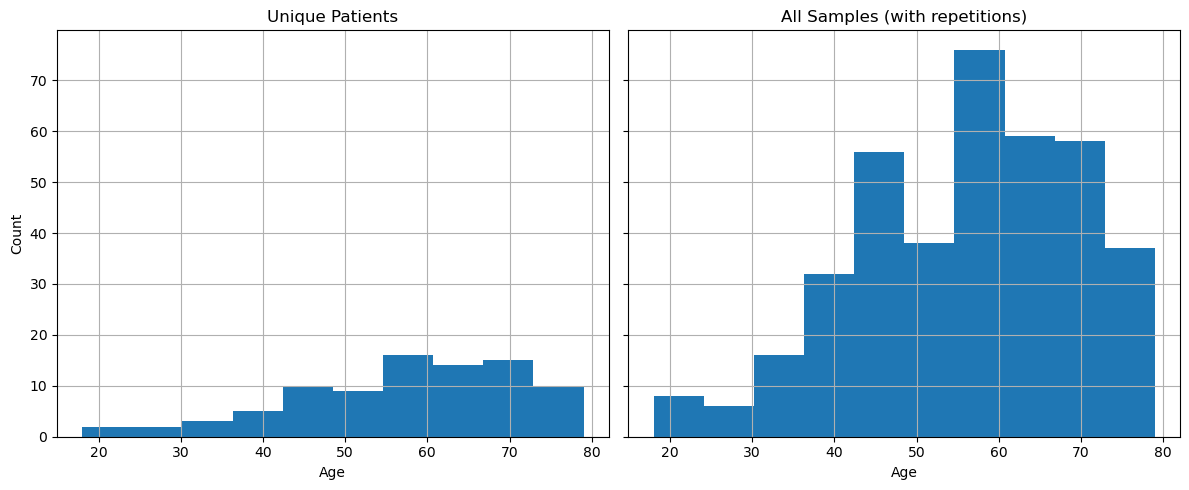

In [64]:
#=======================================
#Plot age of unique patients and entries
#=======================================
import matplotlib.pyplot as plt

unique_patients = df_arraymeta.drop_duplicates(subset="patient")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# unique ages
unique_patients["age"].hist(bins=10, ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].set_title("Unique Patients")

# repeated ages
df_arraymeta["age"].hist(bins=10, ax=axes[1])
axes[1].set_xlabel("Age")
axes[1].set_title("All Samples (with repetitions)")

plt.tight_layout()
plt.savefig("age_histogram.png", dpi=300, bbox_inches="tight")


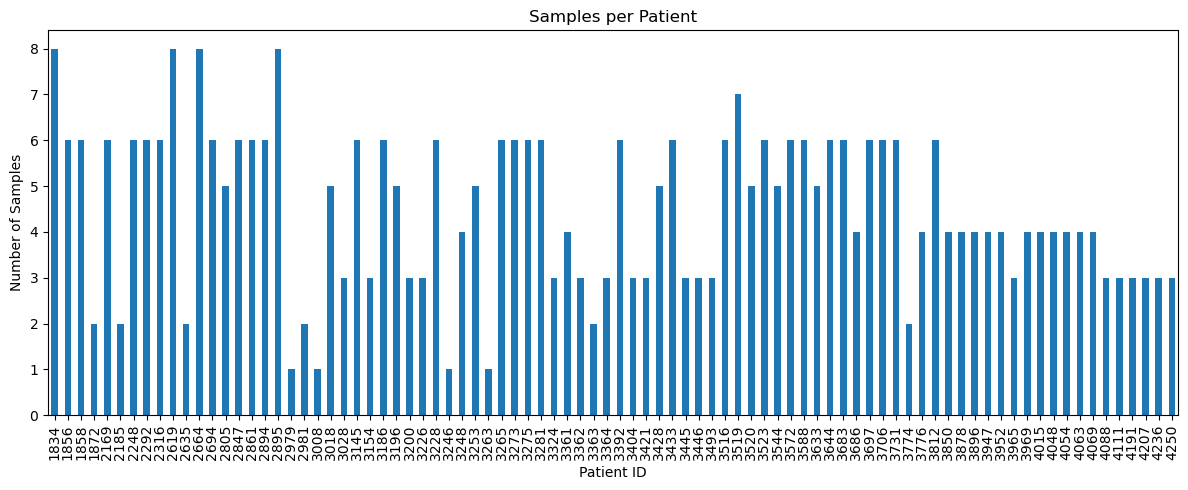

In [66]:
#======================================
#Plot number of repetitions per patient
#======================================
samples_per_patient = df_arraymeta["patient"].value_counts().sort_index()

ax = samples_per_patient.plot(kind="bar", figsize=(12, 5))
ax.set_xlabel("Patient ID")
ax.set_ylabel("Number of Samples")
ax.set_title("Samples per Patient")
plt.tight_layout()
plt.savefig("sample_counts_per_patient.png", dpi=300, bbox_inches="tight")


In [36]:
# Main cell
unique_patients = df_arraymeta.drop_duplicates(subset="patient")

# unique patients
counts_unique = {
    "<70": (unique_patients["age"] < 70).sum(),
    ">=70": (unique_patients["age"] >= 70).sum()
}
print("Counts (unique patients):", counts_unique)

# all samples
counts_all = {
    "<70": (df_arraymeta["age"] < 70).sum(),
    ">=70": (df_arraymeta["age"] >= 70).sum()
}
print("Counts (all samples):", counts_all)


Counts (unique patients): {'<70': 68, '>=70': 18}
Counts (all samples): {'<70': 320, '>=70': 66}


        entries_<70  entries_>=70  unique_<70  unique_>=70
region                                                    
ANCg            104            23          60           13
CB               70            11          44            8
DLPFC           146            32          67           18


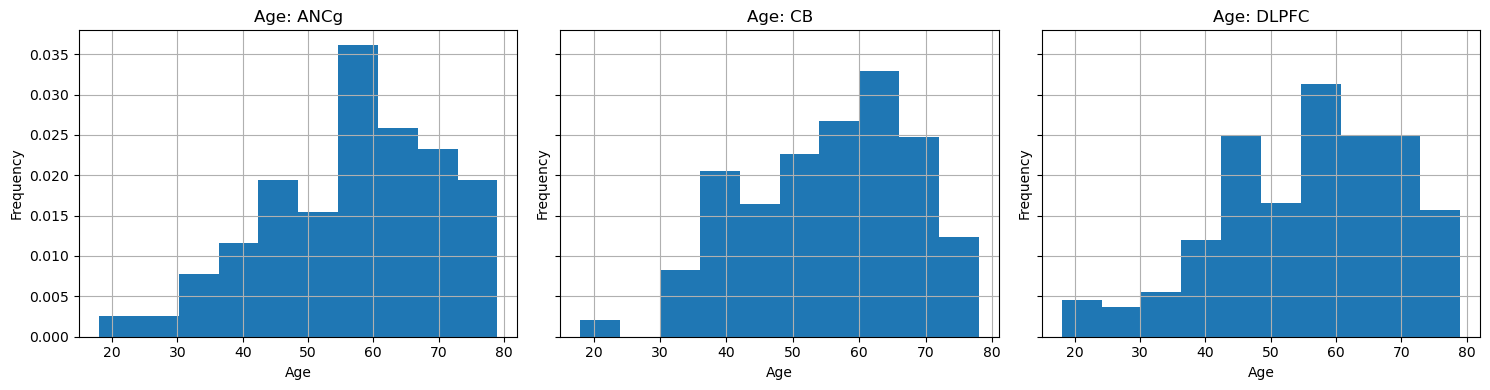

In [72]:
# Main cell
# Build region-specific subsets and plot their age histograms (unique bins for comparability)
regions = {
    "ANCg": "region.ancg",
    "CB": "region.cb",
    "DLPFC": "region.dlpfc",
}

subsets = {name: df_arraymeta[df_arraymeta[col] == 1] for name, col in regions.items()}

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
bins = 10  # fixed across panels for fair comparison
for ax, (name, df_reg) in zip(axes, subsets.items()):
    df_reg["age"].hist(bins=bins, ax=ax,density=True)
    ax.set_title(f"Age: {name}")
    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.savefig("age_histogram_region.png", dpi=300, bbox_inches="tight")

# Summary counts per region: entries vs unique patients, split at 70
summary_rows = []
for name, df_reg in subsets.items():
    uniq = df_reg.drop_duplicates(subset="patient")  # dedupe at patient level
    row = {
        "region": name,
        "entries_<70": (df_reg["age"] < 70).sum(),
        "entries_>=70": (df_reg["age"] >= 70).sum(),
        "unique_<70": (uniq["age"] < 70).sum(),
        "unique_>=70": (uniq["age"] >= 70).sum(),
    }
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows).set_index("region")
print(summary_df)


             mean  median   iqr  range   variance
region                                           
ANCg    56.850394    58.0  19.0     61  13.229404
CB      55.197531    56.0  18.0     60  12.609936
DLPFC   55.820225    57.0  18.0     61  13.762359


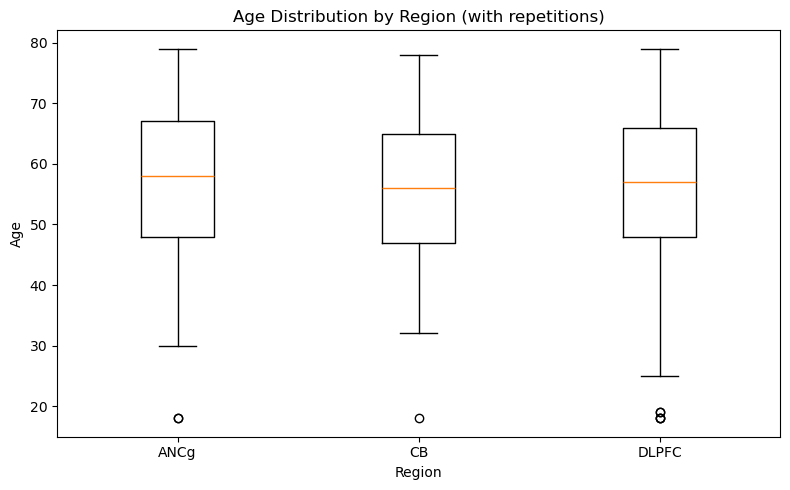

In [70]:
# Main cell
# Boxplots of age entries within each region
regions = {
    "ANCg": "region.ancg",
    "CB": "region.cb",
    "DLPFC": "region.dlpfc",
}

age_data = [df_arraymeta[df_arraymeta[col] == 1]["age"] for col in regions.values()]

fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(age_data, labels=regions.keys())
ax.set_xlabel("Region")
ax.set_ylabel("Age")
ax.set_title("Age Distribution by Region (with repetitions)")
plt.tight_layout()
plt.savefig("age_boxplot_region.png", dpi=300, bbox_inches="tight")

# Summary statistics per region
summary_rows = []
for name, col in regions.items():
    ages = df_arraymeta[df_arraymeta[col] == 1]["age"]
    row = {
        "region": name,
        "mean": ages.mean(),
        "median": ages.median(),
        "iqr": ages.quantile(0.75) - ages.quantile(0.25),
        "range": ages.max() - ages.min(),
        "variance": ages.std()
    }
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows).set_index("region")
print(summary_df)


               mean  median   iqr  range    variance    std_dev
lab                                                            
Davis     55.962264    57.5  20.0     61  196.569991  14.020342
Irvine    54.692308    56.0  17.0     61  158.042440  12.571493
Michigan  57.030675    59.0  18.0     61  179.634856  13.402793


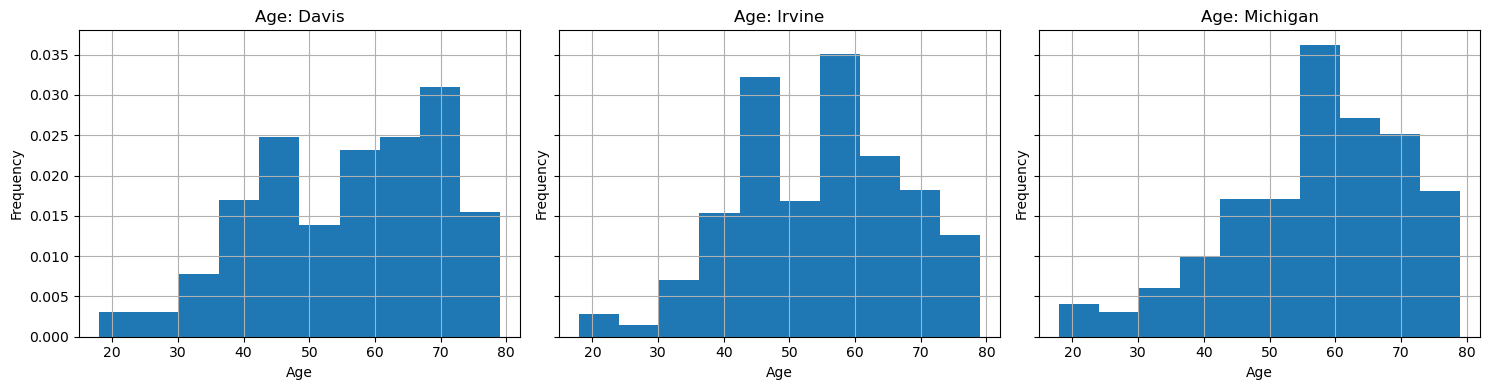

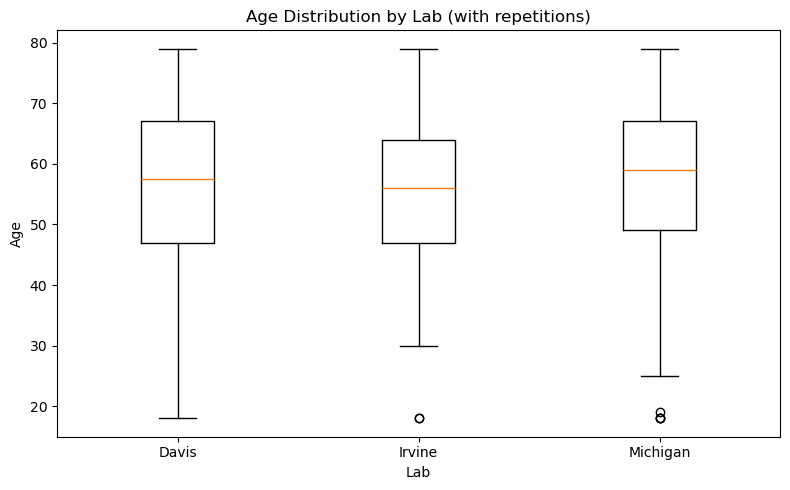

In [74]:
# Main cell
labs = {
    "Davis": "lab.davis",
    "Irvine": "lab.irvine",
    "Michigan": "lab.michigan",
}

subsets_lab = {name: df_arraymeta[df_arraymeta[col] == 1] for name, col in labs.items()}

# summary statistics
summary_rows = []
for name, df_lab in subsets_lab.items():
    ages = df_lab["age"]
    row = {
        "lab": name,
        "mean": ages.mean(),
        "median": ages.median(),
        "iqr": ages.quantile(0.75) - ages.quantile(0.25),
        "range": ages.max() - ages.min(),
        "variance": ages.var(),
        "std_dev": ages.std()
    }
    summary_rows.append(row)

summary_df_labs = pd.DataFrame(summary_rows).set_index("lab")
print(summary_df_labs)

# frequency histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
bins = 10
for ax, (name, df_lab) in zip(axes, subsets_lab.items()):
    df_lab["age"].hist(bins=bins, ax=ax, density=True)
    ax.set_title(f"Age: {name}")
    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.savefig("age_histogram_lab.png", dpi=300, bbox_inches="tight")

# side by side boxplot
age_data_labs = [df_lab["age"] for df_lab in subsets_lab.values()]
fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(age_data_labs, labels=labs.keys())
ax.set_xlabel("Lab")
ax.set_ylabel("Age")
ax.set_title("Age Distribution by Lab (with repetitions)")
plt.tight_layout()
plt.savefig("age_boxplot_lab.png", dpi=300, bbox_inches="tight")


             mean  median   iqr  range    variance    std_dev
sex                                                          
Male    54.178694    55.0  20.0     61  189.857613  13.778883
Female  61.694737    64.0  18.0     33   99.384546   9.969180


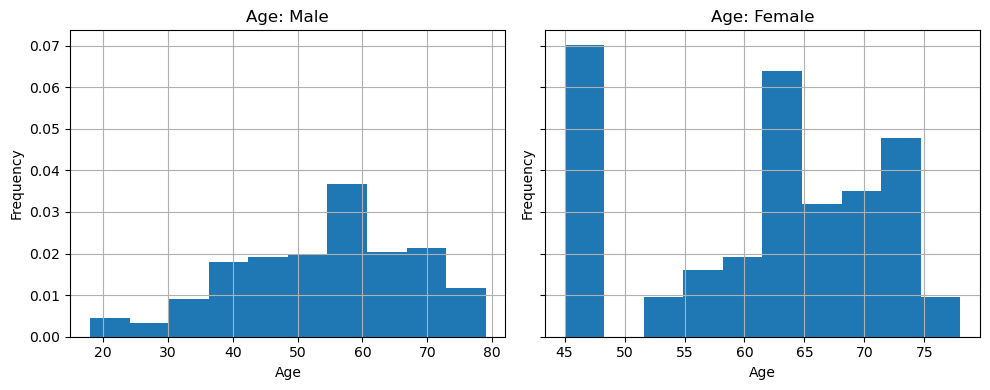

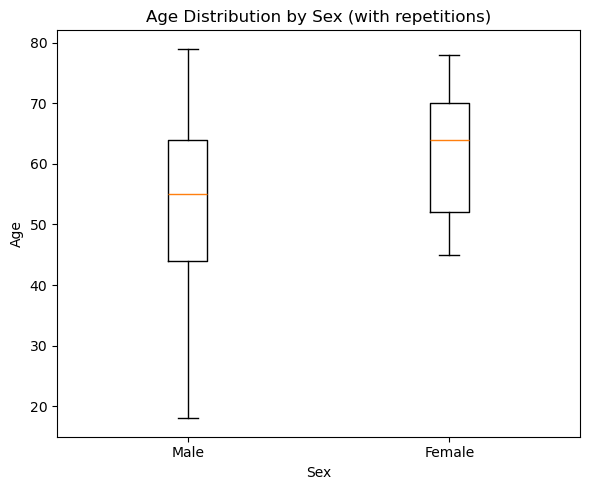

In [76]:
# Main cell
sex_groups = {
    "Male": df_arraymeta[df_arraymeta["sex"] == "M"],
    "Female": df_arraymeta[df_arraymeta["sex"] == "F"],
}

# frequency histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
bins = 10
for ax, (name, df_sex) in zip(axes, sex_groups.items()):
    df_sex["age"].hist(bins=bins, ax=ax, density=True)
    ax.set_title(f"Age: {name}")
    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.savefig("age_histogram_sex.png", dpi=300, bbox_inches="tight")

# side by side boxplot
age_data_sex = [df_sex["age"] for df_sex in sex_groups.values()]
fig, ax = plt.subplots(figsize=(6, 5))
ax.boxplot(age_data_sex, labels=sex_groups.keys())
ax.set_xlabel("Sex")
ax.set_ylabel("Age")
ax.set_title("Age Distribution by Sex (with repetitions)")
plt.tight_layout()
plt.savefig("age_boxplot_sex.png", dpi=300, bbox_inches="tight")

# summary statistics
summary_rows = []
for name, df_sex in sex_groups.items():
    ages = df_sex["age"]
    row = {
        "sex": name,
        "mean": ages.mean(),
        "median": ages.median(),
        "iqr": ages.quantile(0.75) - ages.quantile(0.25),
        "range": ages.max() - ages.min(),
        "variance": ages.var(),
        "std_dev": ages.std()
    }
    summary_rows.append(row)

summary_df_sex = pd.DataFrame(summary_rows).set_index("sex")
print(summary_df_sex)

              mean  median   iqr  range    variance    std_dev
version                                                       
1        53.241667    54.0  20.0     60  184.284449  13.575141
2        60.609589    63.0  14.0     49  134.308597  11.589159


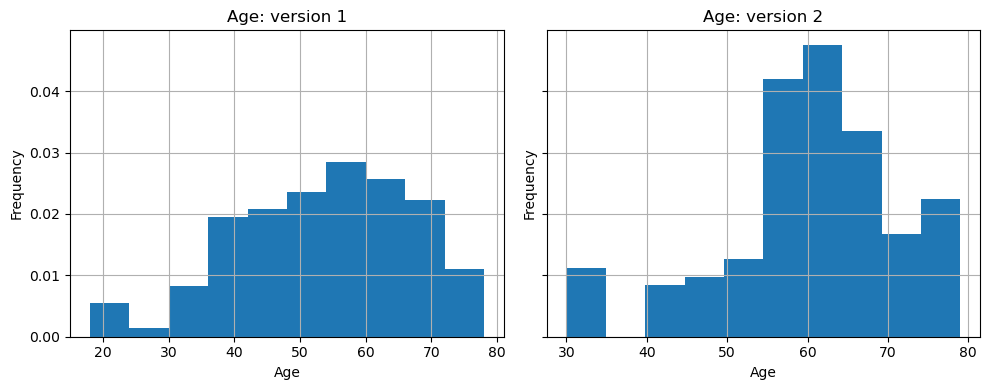

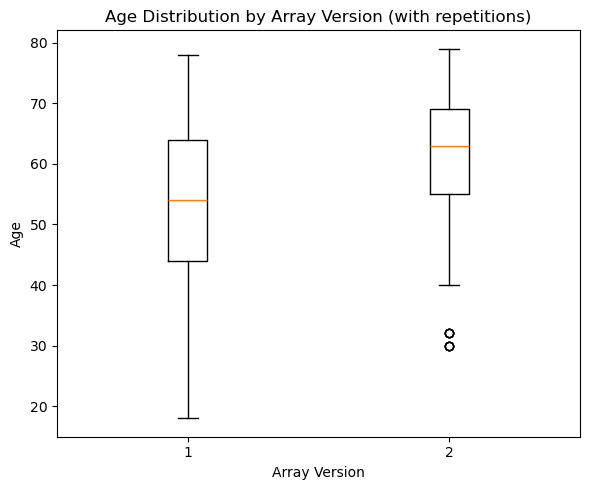

In [78]:
# Main cell
versions = {
    "1": df_arraymeta[df_arraymeta["arrayversion"] == 1],
    "2": df_arraymeta[df_arraymeta["arrayversion"] == 2],
}

# frequency histograms
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
bins = 10
for ax, (name, df_ver) in zip(axes, versions.items()):
    df_ver["age"].hist(bins=bins, ax=ax, density=True)
    ax.set_title(f"Age: version {name}")
    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")
plt.tight_layout()
plt.savefig("age_histogram_version.png", dpi=300, bbox_inches="tight")

# summary statistics
summary_rows = []
for name, df_ver in versions.items():
    ages = df_ver["age"]
    row = {
        "version": name,
        "mean": ages.mean(),
        "median": ages.median(),
        "iqr": ages.quantile(0.75) - ages.quantile(0.25),
        "range": ages.max() - ages.min(),
        "variance": ages.var(),
        "std_dev": ages.std()
    }
    summary_rows.append(row)

summary_df_versions = pd.DataFrame(summary_rows).set_index("version")
print(summary_df_versions)

# side by side boxplot
age_data_versions = [df_ver["age"] for df_ver in versions.values()]
fig, ax = plt.subplots(figsize=(6, 5))
ax.boxplot(age_data_versions, labels=versions.keys())
ax.set_xlabel("Array Version")
ax.set_ylabel("Age")
ax.set_title("Age Distribution by Array Version (with repetitions)")
plt.tight_layout()
plt.savefig("age_boxplot_version.png", dpi=300, bbox_inches="tight")
